In [1]:
from seaborn import color_palette, scatterplot as scatter

from gower.gower_dist import *

In [2]:
starbucks = pd.read_csv('starbucks.csv').iloc[:, 1:]
starbucks["suffix"] = starbucks.item.str.split(" ").str[-1]
starbucks.set_index("item", inplace=True, drop=True)
starbucks

,calories,fat,carb,fiber,protein,type,suffix
item,,,,,,,
8-Grain Roll,350,8.0,67,5,10,bakery,Roll
Apple Bran Muffin,350,9.0,64,7,6,bakery,Muffin
Apple Fritter,420,20.0,59,0,5,bakery,Fritter
Banana Nut Loaf,490,19.0,75,4,7,bakery,Loaf
Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,Doughnut
...,...,...,...,...,...,...,...
Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Sandwich
Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,Sandwich
Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,Parfait


In [3]:
starbucks["carb_per_calorie"] = starbucks.carb / starbucks.calories
starbucks["fat_per_calorie"] = starbucks.fat / starbucks.calories
starbucks["fiber_per_calorie"] = starbucks.fiber / starbucks.calories
starbucks["protein_per_calorie"] = starbucks.protein / starbucks.calories
starbucks["(carb+fat)/calorie"] = starbucks.carb_per_calorie + starbucks.fat_per_calorie
starbucks["(fiber+protein)/calorie"] = starbucks.fiber_per_calorie + starbucks.protein_per_calorie
starbucks["efficiency"] = starbucks["(fiber+protein)/calorie"] - starbucks["(carb+fat)/calorie"]

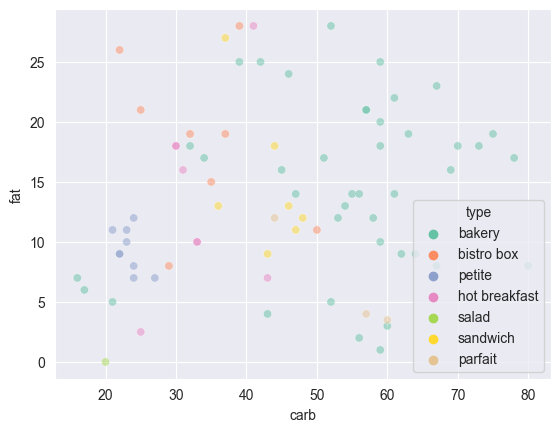

In [4]:
scatter(x=starbucks.carb, y=starbucks.fat,
        hue=starbucks.type, palette="Set2", alpha=0.5)
plt.show()

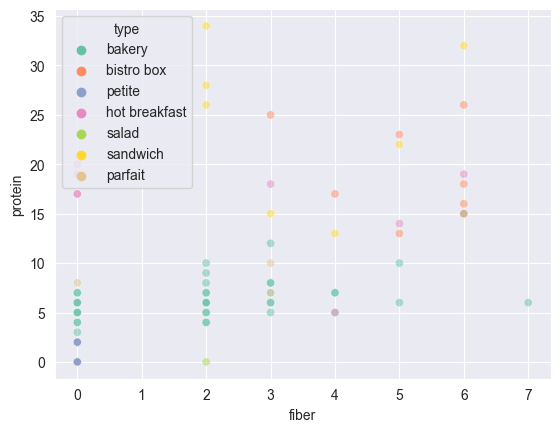

In [5]:
scatter(x=starbucks.fiber, y=starbucks.protein,
        hue=starbucks.type, palette="Set2", alpha=0.5)
plt.show()

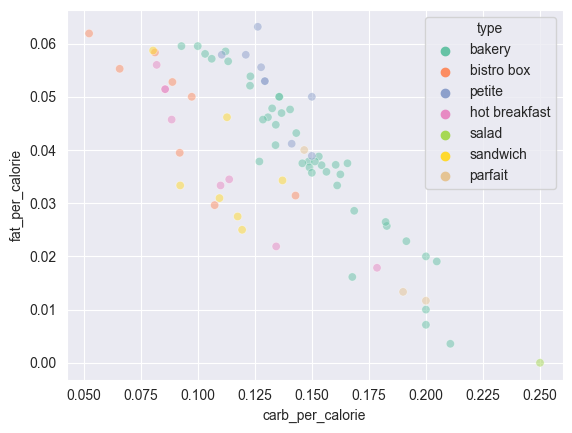

In [6]:
scatter(x=starbucks.carb_per_calorie, y=starbucks.fat_per_calorie,
        hue=starbucks.type, palette="Set2", alpha=0.5)
plt.show()

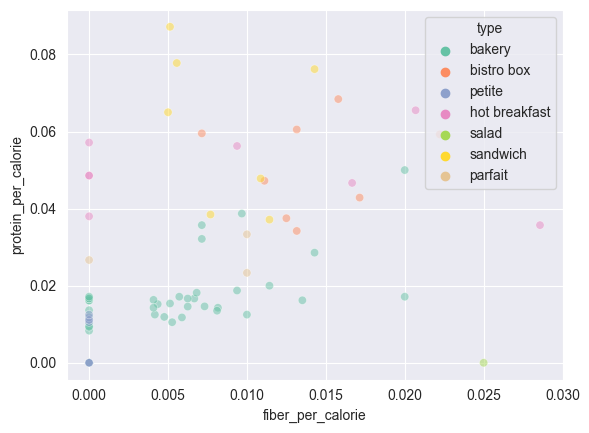

In [7]:
scatter(x=starbucks.fiber_per_calorie, y=starbucks.protein_per_calorie,
        hue=starbucks.type, palette="Set2", alpha=0.5)
plt.show()

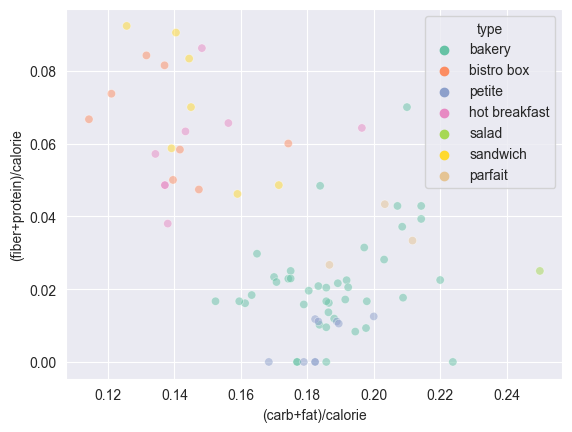

In [8]:
scatter(x=starbucks["(carb+fat)/calorie"], y=starbucks["(fiber+protein)/calorie"],
        hue=starbucks.type, palette="Set2", alpha=0.5)
plt.show()

  0%|          | 0/12 [00:00<?, ?it/s]

[1.] [4.77089822 5.42412997 6.6180664  2.39631957 4.75555517 5.67217693
 6.80154031 4.54362824 5.36888812 5.94349732 6.09186262 5.75326438]


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Best possible MutualInfo score:  0.58284664887343
Best possible RandIndex score:   0.6626689372803363
GiniCoeff MutualInfo loss:  -0.535808910248382
GiniCoeff RandIndex loss:   -0.6527601538547116
Stupid0 MutualInfo loss:    -0.038155680152873184
Stupid0 RandIndex loss:     -0.04448035843483089
Stupid1 MutualInfo loss:    -0.4998558033567793
Stupid1 RandIndex loss:     -0.6481923987298234
Stupid2 MutualInfo loss:    -0.4998558033567793
Stupid2 RandIndex loss:     -0.6481923987298234
Stupid3 MutualInfo loss:    -0.11072178092957713
Stupid3 RandIndex loss:     -0.15901177351271023
Niceness MutualInfo loss:   -0.038155680152873184
Niceness RandIndex loss:    -0.04448035843483089
Neatness MutualInfo loss:   0.0
Neatness RandIndex loss:    -0.0020344678631276647
Silhouette MutualInfo loss: -0.5159600086395523
Silhouette RandIndex loss:  -0.6378942519267808


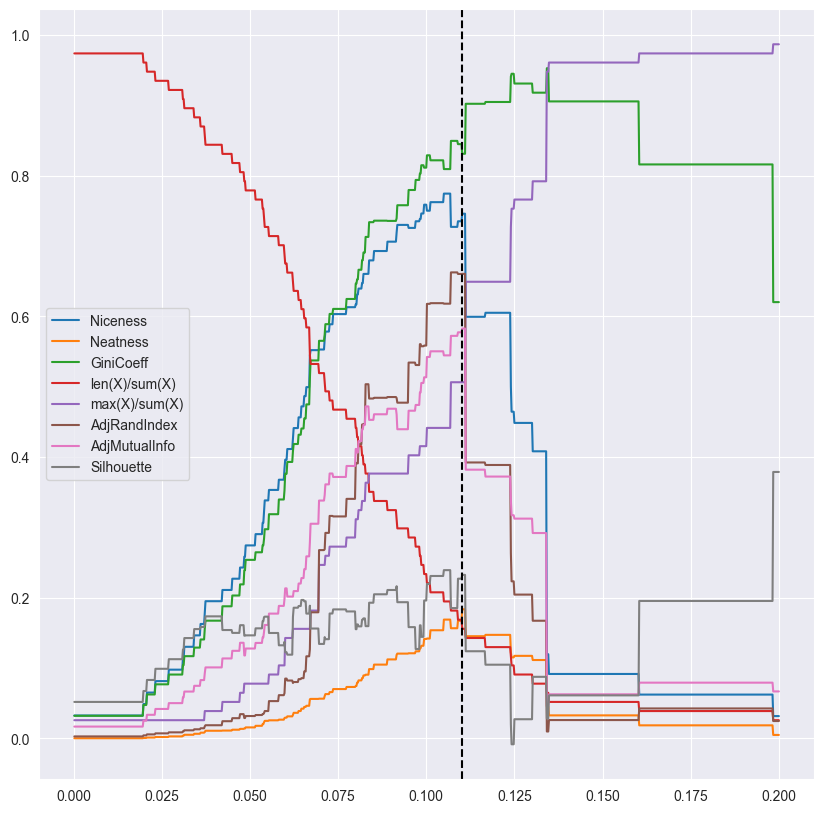

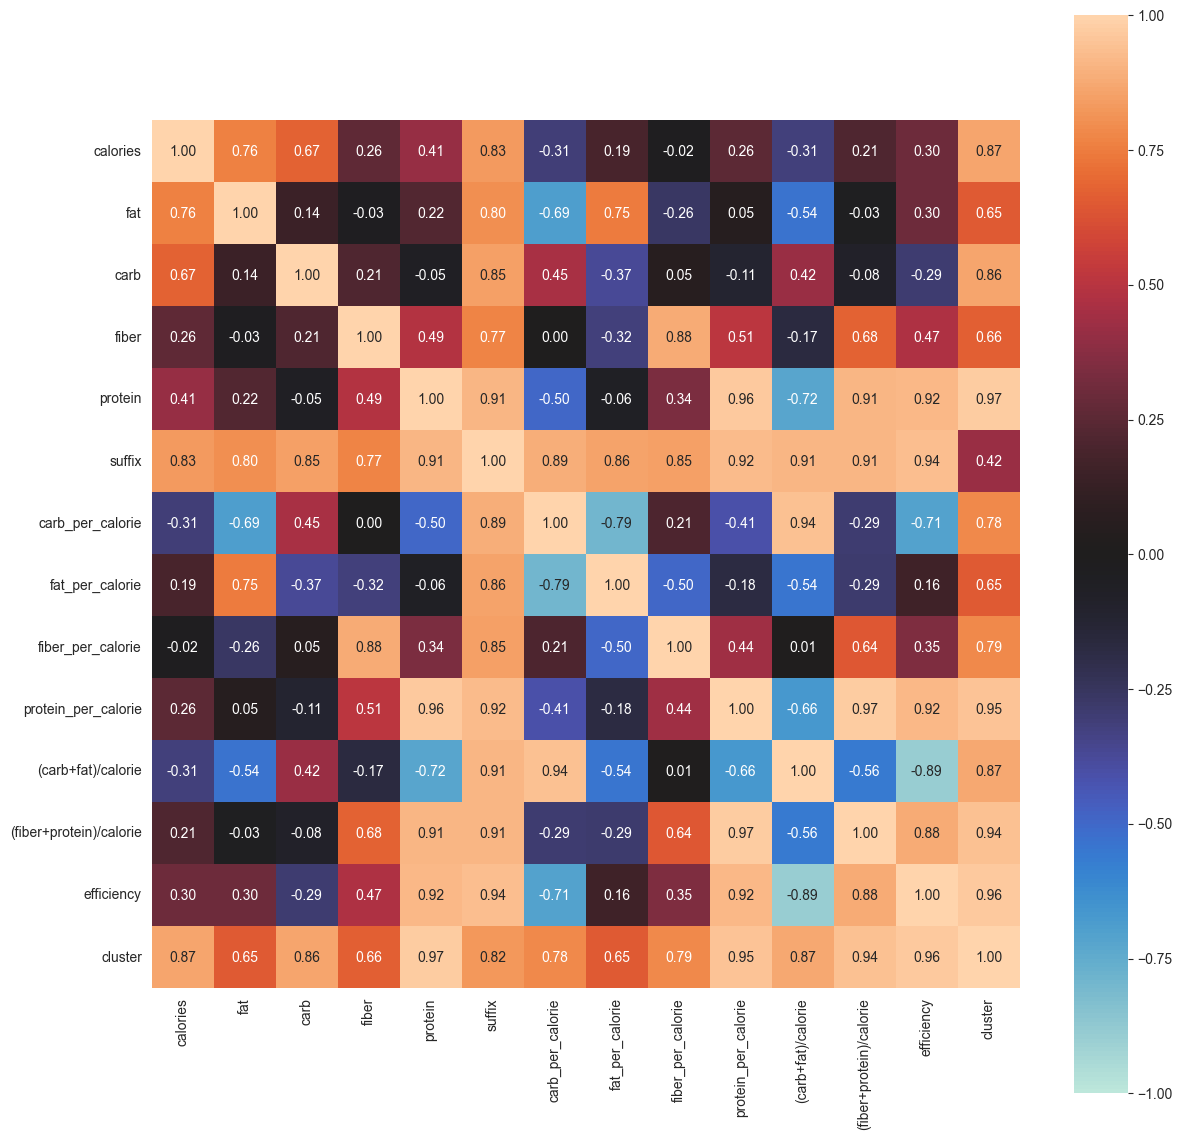

{'Silhouette': 0.23257541154503672, 'Niceness': 0.7461253294028317, 'Neatness': 0.1836314847942755, 'GiniCoeff': 0.8313419117647058, 'len(X)/sum(X)': 0.15584415584415584, 'max(X)/sum(X)': 0.5064935064935064, 'sample': {'eps': 0.1102, 'min_samples': 1}, 'counts_dict': {1: 5, 2: 2, 3: 2, 11: 1, 12: 1, 39: 1}, 'AdjRandIndex': 0.6606344694172086, 'AdjMutualInfo': 0.58284664887343}


In [9]:
cluster = optimize_dbscan(starbucks.drop("type", axis=1), starbucks.type,
                          factor=0.2, precomputed=True)[0].cluster

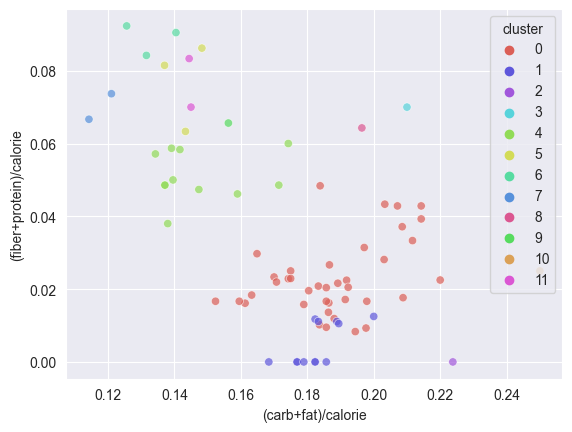

In [10]:
palette = list(color_palette("hls", 12))
np.random.shuffle(palette)

scatter(x=starbucks["(carb+fat)/calorie"], y=starbucks["(fiber+protein)/calorie"],
        hue=cluster, palette=palette, alpha=0.7)
plt.show()


In [11]:
pd.concat([starbucks, cluster], axis=1)


,calories,fat,carb,fiber,protein,type,suffix,carb_per_calorie,fat_per_calorie,fiber_per_calorie,protein_per_calorie,(carb+fat)/calorie,(fiber+protein)/calorie,efficiency,cluster
item,,,,,,,,,,,,,,,
8-Grain Roll,350,8.0,67,5,10,bakery,Roll,0.191429,0.022857,0.014286,0.028571,0.214286,0.042857,-0.171429,0
Apple Bran Muffin,350,9.0,64,7,6,bakery,Muffin,0.182857,0.025714,0.020000,0.017143,0.208571,0.037143,-0.171429,0
Apple Fritter,420,20.0,59,0,5,bakery,Fritter,0.140476,0.047619,0.000000,0.011905,0.188095,0.011905,-0.176190,0
Banana Nut Loaf,490,19.0,75,4,7,bakery,Loaf,0.153061,0.038776,0.008163,0.014286,0.191837,0.022449,-0.169388,0
Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,Doughnut,0.130769,0.046154,0.000000,0.000000,0.176923,0.000000,-0.176923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Sandwich,0.109524,0.030952,0.014286,0.076190,0.140476,0.090476,-0.050000,6
Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,Sandwich,0.092308,0.033333,0.005128,0.087179,0.125641,0.092308,-0.033333,6
Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,Parfait,0.146667,0.040000,0.000000,0.026667,0.186667,0.026667,-0.160000,0
